# Exploratory Data Analysis of the Top 1000 Highest-Ranked Albums on Rate Your Music

## Introduction

### Objectives
- Answer questions about the preferences of the Rate Your Music user base.
- Visualize statistics on the top 1000 highest-ranked albums on Rate Your Music.

### Problem Statement

Rate Your Music does not currently have a functional API, which limits direct access to its data. However, my curiosity about the music preferences of its user base led me to find an alternative approach. Using Selenium, SeleniumBase, and BeautifulSoup, I scraped data on the top 1,000 albums from Rate Your Music on March 9 2025, along with their relevant variables. I then compiled this data into a CSV file, which is what i will use in this Jupyter Notebook.

## Data Overview

In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import nbconvert

from ast import literal_eval

In [9]:
rym_dataframe = pd.read_csv('Top_1000_RYM_Albums_03102025.csv')
rym_dataframe.head()

,Unnamed: 0,Album_Title,Artist_Name,Year of Release,Average_Rating,Number_Of_Ratings,Genres,Descriptors,Language
0,1,To Pimp a Butterfly,Kendrick Lamar,2015,4.39,"91,747","['Conscious Hip Hop', ' Jazz Rap', ' Political...","['political', ' conscious', ' concept album'...",English
1,2,OK Computer,Radiohead,1997,4.30,"117,558","['Alternative Rock', ' Art Rock', ' Post-Britp...","['melancholic', ' anxious', ' alienation', '...",English
2,3,In Rainbows,Radiohead,2007,4.33,"89,039","['Art Rock', ' Alternative Rock', ' Electronic...","['lush', ' male vocalist', ' melancholic', '...",English
3,4,Wish You Were Here,Pink Floyd,1975,4.35,"80,322","['Progressive Rock', ' Art Rock', ' Space Rock...","['melancholic', ' atmospheric', ' progressiv...",English
4,5,"good kid, m.A.A.d city",Kendrick Lamar,2012,4.32,"77,039","['Conscious Hip Hop', ' Hardcore Hip Hop', ' P...","['urban', ' concept album', ' crime', ' con...",English


I Would like to make "Unamed: 0" the index as i believe it is more approriate as it represents rank

In [11]:
new_index = rym_dataframe['Unnamed: 0']
rym_dataframe = rym_dataframe.drop(columns='Unnamed: 0')
rym_dataframe = rym_dataframe.set_axis(new_index,axis='index')
rym_dataframe = rym_dataframe.rename_axis('Rank',axis='index')
rym_dataframe.head()

,Album_Title,Artist_Name,Year of Release,Average_Rating,Number_Of_Ratings,Genres,Descriptors,Language
Rank,,,,,,,,
1,To Pimp a Butterfly,Kendrick Lamar,2015,4.39,"91,747","['Conscious Hip Hop', ' Jazz Rap', ' Political...","['political', ' conscious', ' concept album'...",English
2,OK Computer,Radiohead,1997,4.30,"117,558","['Alternative Rock', ' Art Rock', ' Post-Britp...","['melancholic', ' anxious', ' alienation', '...",English
3,In Rainbows,Radiohead,2007,4.33,"89,039","['Art Rock', ' Alternative Rock', ' Electronic...","['lush', ' male vocalist', ' melancholic', '...",English
4,Wish You Were Here,Pink Floyd,1975,4.35,"80,322","['Progressive Rock', ' Art Rock', ' Space Rock...","['melancholic', ' atmospheric', ' progressiv...",English
5,"good kid, m.A.A.d city",Kendrick Lamar,2012,4.32,"77,039","['Conscious Hip Hop', ' Hardcore Hip Hop', ' P...","['urban', ' concept album', ' crime', ' con...",English


In [12]:
rym_dataframe.shape

(1000, 8)

In [13]:
rym_dataframe.isnull().sum()

Album_Title          0
Artist_Name          0
Year of Release      0
Average_Rating       0
Number_Of_Ratings    0
Genres               0
Descriptors          0
Language             0
dtype: int64

## Data Cleaning and Wranging

There is some preprocessing that needs to be done before i can use this dataframe for vizualization

### Change Year of Release type to integer

In [17]:
rym_dataframe['Year of Release'] = rym_dataframe['Year of Release'].astype('int32',errors='ignore')

### Convert list data into the correct type

In [19]:
rym_dataframe['Genres'] = rym_dataframe['Genres'].apply(literal_eval)
rym_dataframe['Descriptors'] = rym_dataframe['Descriptors'].apply(literal_eval)

### Remove Whitespace for list data

In [21]:
def strip_list(entry_list):
    return [x.strip() for x in entry_list]

In [22]:
rym_dataframe['Genres'] = rym_dataframe['Genres'].apply(strip_list)
rym_dataframe['Descriptors'] = rym_dataframe['Descriptors'].apply(strip_list)

## Exploratory Data Analysis 

We will use the scrapped data to answer questions about the top 1000 albums ranked by Rate Your Music

### What are the most occuring sub-genres

In [26]:
exploded_dataframe_for_genres = rym_dataframe.explode("Genres")
genre_count = exploded_dataframe_for_genres.groupby("Genres")["Album_Title"].count()
sorted_genre_count = genre_count.sort_values(ascending=False)
sorted_genre_count[:30]

Genres
Singer-Songwriter       103
Art Rock                 98
Ambient                  75
Post-Rock                71
Art Pop                  69
Progressive Rock         65
Neo-Psychedelia          63
Experimental Rock        59
Psychedelic Rock         58
Conscious Hip Hop        54
Indie Rock               52
Post-Punk                52
Post-Hardcore            51
Jazz Rap                 50
Noise Rock               50
Experimental Hip Hop     49
Folk Rock                48
Boom Bap                 47
Dream Pop                47
Psychedelic Pop          45
Hard Rock                45
Jazz-Rock                45
Alternative Rock         45
Blues Rock               41
Drone                    40
Hardcore Hip Hop         38
Pop Rock                 37
Avant-Garde Jazz         36
Jazz Fusion              35
Progressive Pop          35
Name: Album_Title, dtype: int64

<AxesSubplot:xlabel='Sub-Genres'>

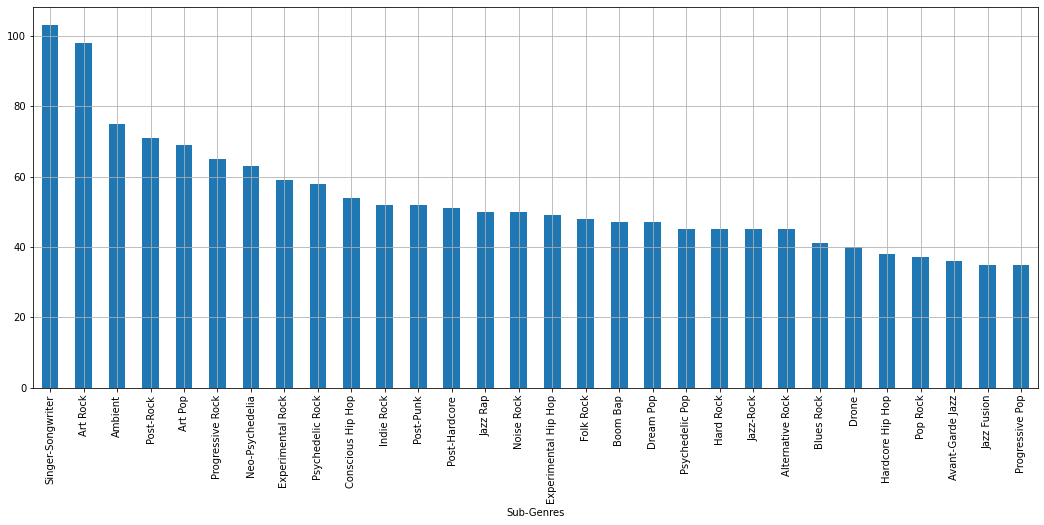

In [27]:
fig, ax = plt.subplots(figsize=(18, 7))
sorted_genre_count[:30].plot(ax=ax,kind="bar",grid=True,xlabel='Sub-Genres')

The most popular sub-genre is **Singer-Songwriter** 

According to Rate Your Music, the Singer-Songwriter genre is defined by “confessional or political lyrics, typically with sparse acoustic accompaniment (acoustic guitar or piano), and an arrangement that relies more on the strength of the song and the performance than on production techniques or musical style.” Additionally, the term “Singer-Songwriter” originated in the late 60s to early 70s, but its roots trace back to the 15th and 16th centuries. Given the genre’s long history and its prominence during a popular musical era, it’s no surprise that Singer-Songwriter is one of the most frequent genres in the top 1000 list. You can learn more here: 

https://rateyourmusic.com/genre/singer-songwriter/

A close second is **Art Rock**

According to Rate Your Music, Art Rock is defined as music that “attempts to expand the bounds of rock within conventional structures, often using outside influences or experimentation for conceptual or thematic purposes.” This subgenre has a long history, originating in the 1950s and 1960s in British art schools, where artists were exposed to academic disciplines and a more conceptual approach to music theory. Given that Rate Your Music users tend to have a strong affinity for rock music, it makes sense that Art Rock is one of the most frequently occurring genres in the top 1000 list. Artists from every decade have embraced its sound, further cementing its influence. You can learn more here:

https://rateyourmusic.com/genre/art-rock/

After the top two subgenres, there’s a noticeable drop, as shown in the bar plot. Beyond the top two, it’s clear that the user base’s preferences lean toward various forms of rock music, with some appearances of pop, hip-hop, and jazz music as well.

### Who are the most occuring artist

In [30]:
artist_count = rym_dataframe.groupby("Artist_Name")['Artist_Name'].count()
sorted_artist_count = artist_count.sort_values(ascending=False)
sorted_artist_count[:15]

Artist_Name
Berliner Philharmoniker    9
John Coltrane              9
David Bowie                8
Wiener Philharmoniker      8
Swans                      7
Miles Davis                7
Neil Young                 7
Led Zeppelin               6
Pink Floyd                 6
The Beatles                6
Elliott Smith              6
Kanye West                 6
Bob Dylan                  6
Radiohead                  6
Black Sabbath              6
Name: Artist_Name, dtype: int64

Most of these artist have pretty large discographies, for example John Coltrane and Miles Davis have released over 50 albums each. As expected most of these artist are from varius strains of rock music, with a few jazz, classical, singer-songwriter artist. 

### What are the most popular years

In [33]:
year_count = rym_dataframe.loc[rym_dataframe['Year of Release'] != 0].groupby('Year of Release')['Album_Title'].count()
year_count.sort_values(ascending=False)[:20]

Year of Release
1971    34
1994    32
1996    29
1999    28
1972    27
1998    24
2000    24
1970    24
1969    23
1997    23
1995    23
1992    22
1977    22
1973    22
1975    21
2002    20
1967    20
2001    19
2003    18
2005    17
Name: Album_Title, dtype: int64

<AxesSubplot:xlabel='Year of Release'>

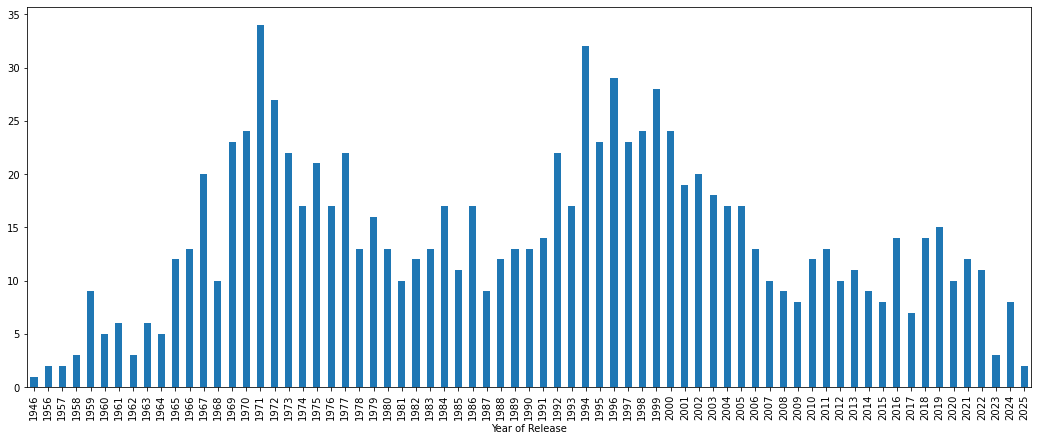

In [34]:
fig2, ax2 = plt.subplots(figsize=(18, 7))
year_count.plot(ax=ax2,kind='bar')

The two most popular time periods seem to be the late 1960s to 1970s and the 1990s to mid-2000s. There is a noticeable dip in the 1980s, and in the second half of the 2000s, a downward trend begins. The least occurring time period is 1946 to 1964.

### What are the most popular languages?

In [37]:
langauge_count = rym_dataframe.groupby("Language")['Album_Title'].count()
sorted_langauge_count = langauge_count.sort_values(ascending=False)
sorted_langauge_count

Language
English                       707
None                          155
Spanish                        28
Japanese                       19
Portuguese                     14
Japanese, English              10
German                          9
English, French                 8
English, Spanish                7
English, Japanese               6
Portuguese, English             4
Latin                           3
English, Yoruba                 3
Polish                          2
English, Portuguese             2
English, German                 2
Norwegian, English              1
Portuguese, Spanish             1
Norwegian, Danish               1
Russian                         1
Norwegian                       1
Spanish, French                 1
Bulgarian                       1
Icelandic                       1
Korean, English                 1
Korean                          1
Japanese, Chinese, English      1
German, English                 1
French                          1
Engli

There are some languages that are grouped together because some albums contain multiple languages.

I would like to have seperate languages. Im going to take the value of these grouped languages and add them into the indivudual respective language.

In [39]:
for x,y in sorted_langauge_count.iteritems():
    if "," in x:
        for language in x.split(","):
            try:
                sorted_langauge_count[language.strip()] += y
            except KeyError:
                sorted_langauge_count[language.strip()] = y
        sorted_langauge_count = sorted_langauge_count.drop(labels=x)

In [40]:
sorted_langauge_count.sort_values(ascending=False)

Language
English       760
None          155
Spanish        37
Japanese       37
Portuguese     21
German         13
French         13
Latin           5
Norwegian       4
Yoruba          3
Icelandic       2
Korean          2
Polish          2
Russian         1
Bulgarian       1
Turkish         1
Danish          1
Chinese         1
Haitian         1
Name: Album_Title, dtype: int64

It's quite clear that in an english speaking music discussion platform the highest ranked albums would be in english, so for the vizualization i would like to exclude english and focus on non english albums.

In [42]:
non_english_languages = sorted_langauge_count.drop(labels=['English','None'])

<AxesSubplot:xlabel='Language'>

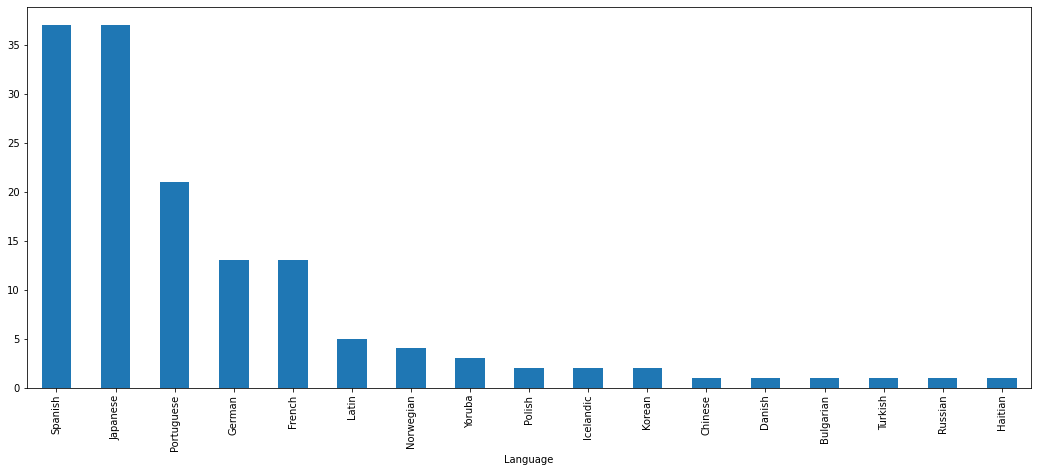

In [43]:
fig3, ax3 = plt.subplots(figsize=(18, 7))
non_english_languages.sort_values(ascending=False).plot(ax=ax3,kind='bar')

Spanish and Japanese lead in non-English language representation in the top 1,000. In my view, this reflects, at least in part, the cultural influence of Spanish and Latin cultures (including some Portuguese albums) as well as Japanese culture in the West. I see Rate Your Music's demographic as western and this chart in a minor way can show western english speaking attitudes and preferences towards non-english music.

### What are the most occuring non-vocal sub-genres

In [46]:
exploded_dataframe_for_non_vocal_genres = rym_dataframe.loc[rym_dataframe['Language'] == 'None'].explode("Genres")
non_vocal_genre_count = exploded_dataframe_for_non_vocal_genres.groupby("Genres")["Album_Title"].count()
sorted_non_voal_genre_count = non_vocal_genre_count.sort_values(ascending=False)
sorted_non_voal_genre_count[:30]

Genres
Post-Bop                  30
Ambient                   27
Avant-Garde Jazz          26
Hard Bop                  22
Romanticism               22
Video Game Music          17
Modern Classical          16
Modal Jazz                16
Drone                     15
Cool Jazz                 14
Jazz Fusion               13
Spiritual Jazz            12
Orchestral Music          11
Cinematic Classical       11
Free Jazz                 11
Chamber Music             10
Symphony                  10
Dark Ambient              10
Minimalism                10
Progressive Electronic     9
Space Ambient              7
Baroque Music              7
Post-Rock                  7
Ballet                     6
Experimental Big Band      6
Third Stream               6
Sequencer & Tracker        6
Noise                      6
Jazz-Funk                  6
Classical Period           5
Name: Album_Title, dtype: int64

<AxesSubplot:xlabel='Sub-Genres'>

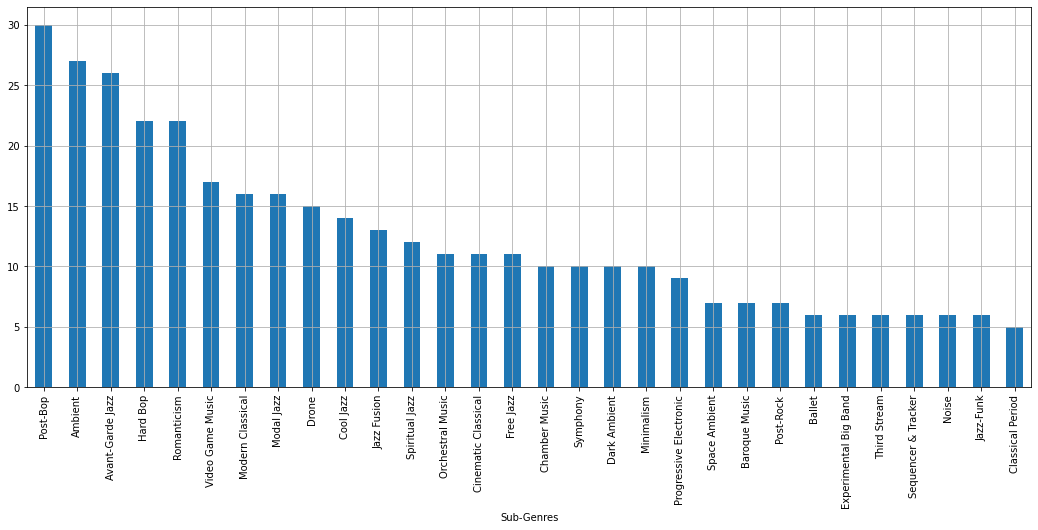

In [47]:
fig4, ax4 = plt.subplots(figsize=(18, 7))
sorted_non_voal_genre_count[:30].plot(ax=ax4,kind="bar",grid=True,xlabel='Sub-Genres')

### What are the most occuring non-vocal artist

In [49]:
non_vocal_artist_count = rym_dataframe.loc[rym_dataframe['Language'] == 'None'].groupby("Artist_Name")['Artist_Name'].count()
sorted_non_vocal_artist_count = non_vocal_artist_count.sort_values(ascending=False)
sorted_non_vocal_artist_count[:25]

Artist_Name
John Coltrane                       8
Miles Davis                         6
Wiener Philharmoniker               6
Berliner Philharmoniker             5
Tim Hecker                          4
Herbie Hancock                      4
Duke Ellington                      3
Takács Quartet                      2
Columbia Symphony Orchestra         2
Glenn Gould                         2
Godspeed You! Black Emperor         2
近藤浩治 [Koji Kondo]                   2
Charles Mingus                      2
John Fahey                          2
Stars of the Lid                    2
Lee Morgan                          2
Pharoah Sanders                     2
New York Philharmonic               2
Steve Reich and Musicians           2
Evgeni Koroliov                     2
Nobuo Uematsu                       2
Andrew Prahlow                      2
Art Blakey & The Jazz Messengers    2
C418                                2
Wayne Shorter                       2
Name: Artist_Name, dtype: int64

### How are women represented in the top 1000

Rate Your Music doesn't necessarily have a classification whether an artist is Male or Female but they do have a 'male vocalist' and 'female vocalist' descriptor which we will use to gain some insight into the discrepancy between Male and Female artist.

In [52]:
exploded_dataframe_for_descriptors = rym_dataframe.explode("Descriptors")
descriptors_count = exploded_dataframe_for_descriptors.groupby("Descriptors")["Album_Title"].count()

In [53]:
gender_count = descriptors_count[['male vocalist','female vocalist']]
gender_count

Descriptors
male vocalist      710
female vocalist    182
Name: Album_Title, dtype: int64

<AxesSubplot:>

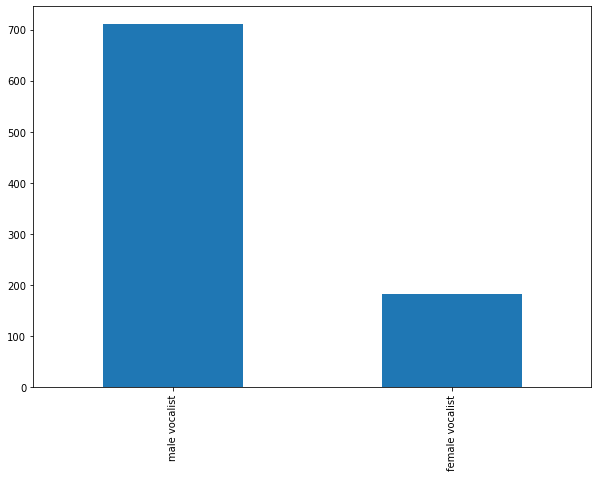

In [54]:
fig6, ax6 = plt.subplots(figsize=(10, 7))
gender_count.plot(ax=ax6,kind="bar",xlabel="")

There’s a significant discrepancy in representation between male and female vocalists. I expected this gap to be similar, if not wider, in addition non-vocal genres such as jazz and classical, are highly represented in the top 100 and tend to be more male-dominated than some vocal genres. In addition some artist can have both male and female vocals.

Although the history of women in music has been ever-evolving, I wonder if the representation of female vocalists varies by year of release.

In [56]:
female_year_count = rym_dataframe.loc[
    (rym_dataframe['Year of Release'] != 0) & 
    (rym_dataframe['Descriptors'].apply(lambda x: 'female vocalist' in x))
].groupby('Year of Release')['Album_Title'].count()

female_year_count.sort_values(ascending=False)[:20]

Year of Release
1971    6
2019    6
1997    6
1999    6
2020    5
1975    5
2002    5
2018    5
2003    5
2004    5
2000    4
1985    4
1998    4
2006    4
2008    4
1996    4
1995    4
2010    4
1994    4
1993    4
Name: Album_Title, dtype: int64

<AxesSubplot:xlabel='Year of Release'>

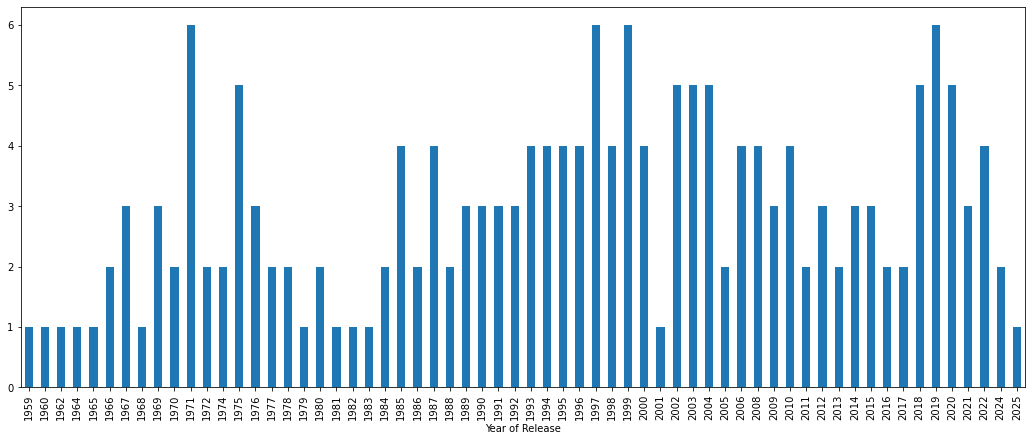

In [57]:
fig7, ax7 = plt.subplots(figsize=(18, 7))
female_year_count.plot(ax=ax7,kind='bar')

The trend seems to be little different compared to the overall trend. The 70s doesn't seem to be as strong for female vocalist. The strongest decade seems to be the 90s and for female vocalist we don't see much of a drop off going into the 21st century like we do for the overall bar chart.

Now lets vizualize the discrepancy 

In [60]:
male_year_count = rym_dataframe.loc[
    (rym_dataframe['Year of Release'] != 0) & 
    (rym_dataframe['Descriptors'].apply(lambda x: 'male vocalist' in x))
].groupby('Year of Release')['Album_Title'].count()

In [61]:
discrepancy = male_year_count - female_year_count

<AxesSubplot:xlabel='Year of Release'>

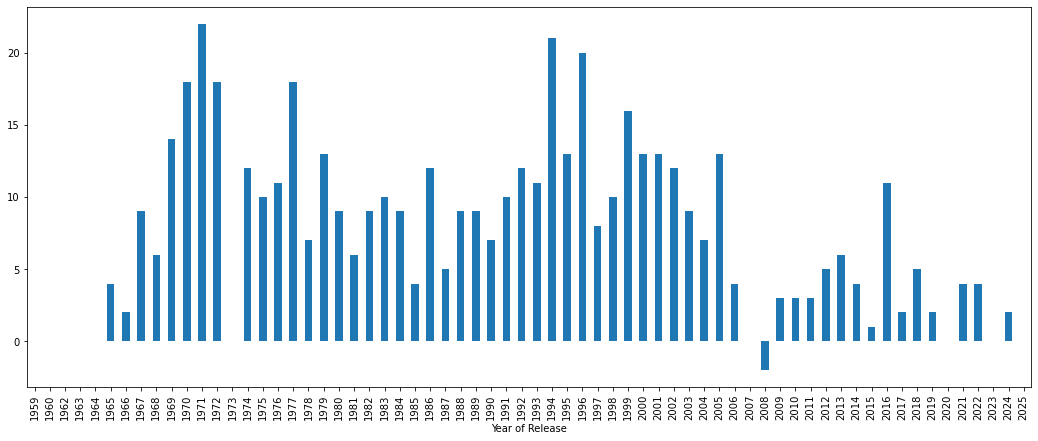

In [62]:
fig8, ax8 = plt.subplots(figsize=(18, 7))
discrepancy.plot(ax=ax8,kind='bar')

In [63]:
discrepancy[discrepancy.index == 2008]

Year of Release
2008   -2.0
Name: Album_Title, dtype: float64

We see the biggest discrepancy in the late 60s, 70s and 90s. The discrepancy between male and female vocalist starts to decrease in the 21 century. 2008 being the only year where there is more female representation than male.

### What are the most occuring sub-genres from female vocalist

In [66]:
exploded_dataframe_for_genres_from_fv = rym_dataframe.loc[(rym_dataframe['Descriptors'].apply(lambda x: 'female vocalist' in x))].explode("Genres")
fv_genre_count = exploded_dataframe_for_genres_from_fv.groupby("Genres")["Album_Title"].count()
sorted_fv_genre_count = fv_genre_count.sort_values(ascending=False)
sorted_fv_genre_count[:30]


Genres
Art Pop              28
Singer-Songwriter    28
Dream Pop            24
Progressive Pop      19
Neo-Psychedelia      17
Post-Rock            17
Indie Rock           16
Ambient              16
Experimental Rock    16
Noise Rock           16
Ambient Pop          13
Alternative Rock     13
Noise Pop            13
Jazz Pop             13
Gothic Rock          12
Shoegaze             12
Trip Hop             11
Art Rock             11
Indie Pop            10
Psychedelic Pop      10
Dance-Pop            10
Chamber Pop          10
Ethereal Wave        10
Lounge                9
Chamber Folk          9
Glitch Pop            9
Video Game Music      9
Post-Punk             9
Drone                 9
Indietronica          8
Name: Album_Title, dtype: int64

<AxesSubplot:xlabel='Sub-Genres'>

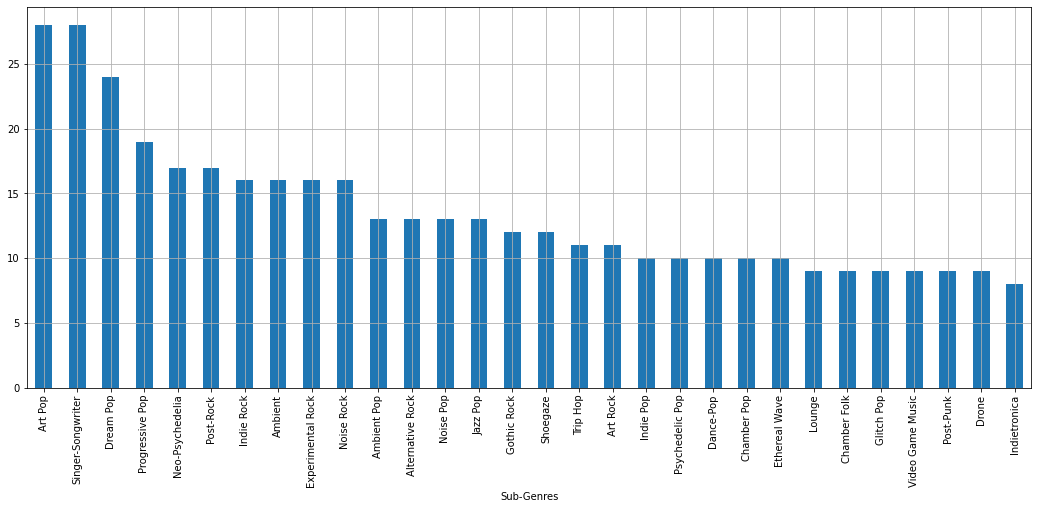

In [67]:
fig8, ax8 = plt.subplots(figsize=(18, 7))
sorted_fv_genre_count[:30].plot(ax=ax8,kind="bar",grid=True,xlabel='Sub-Genres')

In comparison to the overall bar graph this bar graph features a lot more pop music

## What are the most popular artist with female vocals

In [95]:
artist_count = rym_dataframe.loc[(rym_dataframe['Descriptors'].apply(lambda x: 'female vocalist' in x))].groupby("Artist_Name")['Artist_Name'].count()
artist_count
#artist_count = rym_dataframe
sorted_artist_count = artist_count.sort_values(ascending=False)
sorted_artist_count[:15]


Artist_Name
Swans                  6
Joni Mitchell          4
Björk                  4
Stereolab              4
Kate Bush              4
青葉市子 [Ichiko Aoba]     4
Sonic Youth            4
Joanna Newsom          3
Yo La Tengo            3
Sade                   3
Fiona Apple            3
PJ Harvey              3
Nina Simone            3
目黒将司 [Shoji Meguro]    3
Portishead             3
Name: Artist_Name, dtype: int64

With the exception of Swans and Sonic Youth all these artist are feature virtual all female vocals. Most of these artist are part of the most popular female vocalist genres like Art Pop and Singer-Songwriter.

### What are the most occuring descriptros 

In [ ]:
exploded_dataframe_for_descriptors = rym_dataframe.explode("Descriptors")
descriptors_count = exploded_dataframe_for_descriptors.groupby("Descriptors")["Album_Title"].count()
sorted_descriptors_count = descriptors_count.sort_values(ascending=False)
sorted_descriptors_count[:30]

In [ ]:
fig5, ax5 = plt.subplots(figsize=(18, 7))
sorted_descriptors_count[:30].plot(ax=ax5,kind="bar",grid=True)

# Conclusion

This notebook gave us some insight on the preferences and biases of the Rate Your Music and answered questions i was curious about as a music fan and a regular user of the site. If we had a more robust RYM API we might be able to do so much more, but for now i am content with the insights shown here.

End of notebook.